In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import syllables
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('../Data/train.csv')

In [4]:
excerpts = df['excerpt']

In [5]:
i = 0
excerptData = {}
for entry in excerpts:
    count = 0
    excerptData[i] = [len(entry.split()), len(re.split(r'\.!?', entry))]
    for word in entry.split():
        word = word.strip(',.')
        count += syllables.estimate(word)
    excerptData[i].append(count)
    i += 1

In [6]:
def fleschKincaid(words, sentences, syllableCount):
    return (206.835 - 1.015*(words/sentences) - 84.6*(syllableCount/words))

In [7]:
for i in range(len(excerptData)):
    excerptData[i].append(fleschKincaid(*excerptData[i]))

In [8]:
excerptData = np.array(list(excerptData.values()))

In [9]:
fleschValues = excerptData[:, 3].reshape(-1,1)

In [10]:
targetValues = np.array(df['target'])

In [11]:
reg = LinearRegression().fit(fleschValues, targetValues)

In [12]:
predictions = reg.predict(fleschValues)
reg.intercept_

-2.8530248296671696

Text(0, 0.5, 'Target Values')

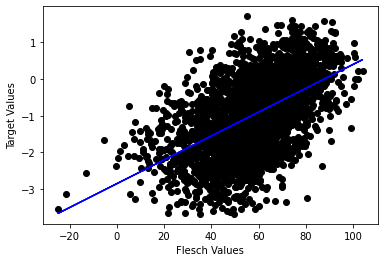

In [13]:
plt.scatter(fleschValues, targetValues, color='Black')
plt.plot(fleschValues, predictions, color='blue')
plt.xlabel("Flesch Values")
plt.ylabel("Target Values")

In [14]:
mean_squared_error(targetValues,predictions, squared = False)

0.867364494296719

In [15]:
r2_score(targetValues, predictions)

0.2955194151569047

In [16]:
scores = cross_val_score(reg, fleschValues, targetValues, scoring="neg_root_mean_squared_error", cv=10)
scores = - scores

In [17]:
scores, scores.mean(), scores.std()

(array([0.73260754, 0.96659198, 1.02602268, 0.92685553, 0.88928652,
        0.95754052, 0.96349028, 0.84602094, 0.66314134, 0.87047167]),
 0.8842028989598489,
 0.1067270209235667)